# xG Scatter Plots - League Two

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
# import matplotlib.colors as mcolors
# from matplotlib import cm
from highlight_text import fig_text, ax_text
# from matplotlib.colors import LinearSegmentedColormap, NoNorm
# from matplotlib import cm
import matplotlib.gridspec as gridspec
# import numpy as np

from PIL import Image
import urllib
import json
import os

In [4]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../assets/stylesheets/soc_base.mplstyle")

## Read the data

In [6]:
df = pd.read_csv('data/league_two_xg.csv', index_col=0)
df

,match_id,date,referee,variable,value,venue,team_id,team_name,team_lineup
0,3916384,2022-07-30 09:00:00,Bobby Madden,xG_for,1.72,H,8484,Bradford City,4 - 2 - 3 - 1
1,3916384,2022-07-30 09:00:00,Bobby Madden,xG_ag,0.21,H,8484,Bradford City,4 - 2 - 3 - 1
2,3916381,2022-07-30 09:00:00,Thomas Kirk,xG_for,2.46,H,10196,Carlisle United,3 - 5 - 2
3,3916381,2022-07-30 09:00:00,Thomas Kirk,xG_ag,0.28,H,10196,Carlisle United,3 - 5 - 2
4,3916396,2022-07-30 09:00:00,Chris Pollard,xG_for,1.88,H,8351,Leyton Orient,4 - 3 - 3
...,...,...,...,...,...,...,...,...,...
423,3916500,2022-09-17 09:00:00,Sam Purkiss,xG_ag,2.17,A,8493,Rochdale,4 - 2 - 3 - 1
424,3916503,2022-09-17 09:00:00,Will Finnie,xG_for,0.31,A,8488,Hartlepool United,3 - 4 - 2 - 1
425,3916503,2022-09-17 09:00:00,Will Finnie,xG_ag,1.46,A,8488,Hartlepool United,3 - 4 - 2 - 1
426,3916502,2022-09-17 09:00:00,Ross Joyce,xG_for,0.49,A,7946,Harrogate Town,4 - 2 - 3 - 1


In [36]:
top_10 = [
    8351, 6350, 8651, 10253, 8484,
    282326, 9818, 10005, 9784, 158316
]
top_10_colors=[
    '#ed2227', '#2a4b80', '#8c2d42', '#ac152a',
    '#7f1734', '#000000', '#faac28', '#000000',
    '#182544', '#00669d'
]

## Function to plot scatter plot

In [52]:
def plot_scatter_xg(ax, team_id, color='red', label_x=False, label_y=False):
    '''
    This function plots the scatter xG of all matches in League Two.
    '''
    ax.grid(ls='--', color='lightgrey')
    # ----------------------------------------------------------------
    # -- Filter data
    df_aux_h = df[(df['team_id'] == team_id) & (df['venue'] == 'H')]
    df_aux_a = df[(df['team_id'] == team_id) & (df['venue'] == 'A')]
    # ----------------------------------------------------------------
    # -- Scatter plots
    ax.scatter(
        df[df['variable'] == 'xG_ag']['value'], df[df['variable'] == 'xG_for']['value'], 
        alpha=.1, lw=1,
        zorder=3, s=20
    )
    ax.scatter(
        df_aux_h[df_aux_h['variable'] == 'xG_ag']['value'], df_aux_h[df_aux_h['variable'] == 'xG_for']['value'], 
        alpha=1, lw=1, ec='black', fc=color,
        zorder=3, s=40
    )
    ax.scatter(
        df_aux_a[df_aux_a['variable'] == 'xG_ag']['value'], df_aux_a[df_aux_a['variable'] == 'xG_for']['value'], 
        alpha=1, lw=1, ec=color, fc='white',
        zorder=3, s=40, hatch='///////'
    )
    # ----------------------------------------------------------------
    # -- Set limits and draw divider line.
    ax.set_xlim(0,round(df['value'].max()+.5))
    ax.set_ylim(0,round(df['value'].max()+.5))
    ax.plot(
        [0,ax.get_xlim()[1]], [0,ax.get_ylim()[1]], 
        ls='--', color='black', lw=1,
        zorder=2
    )
    # ----------------------------------------------------------------
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ----------------------------------------------------------------
    if label_x:
        ax.set_xlabel('xGA (xG conceded)')
    if label_y:
        ax.set_ylabel('xGF (xG created)')
    return ax

## Final plot

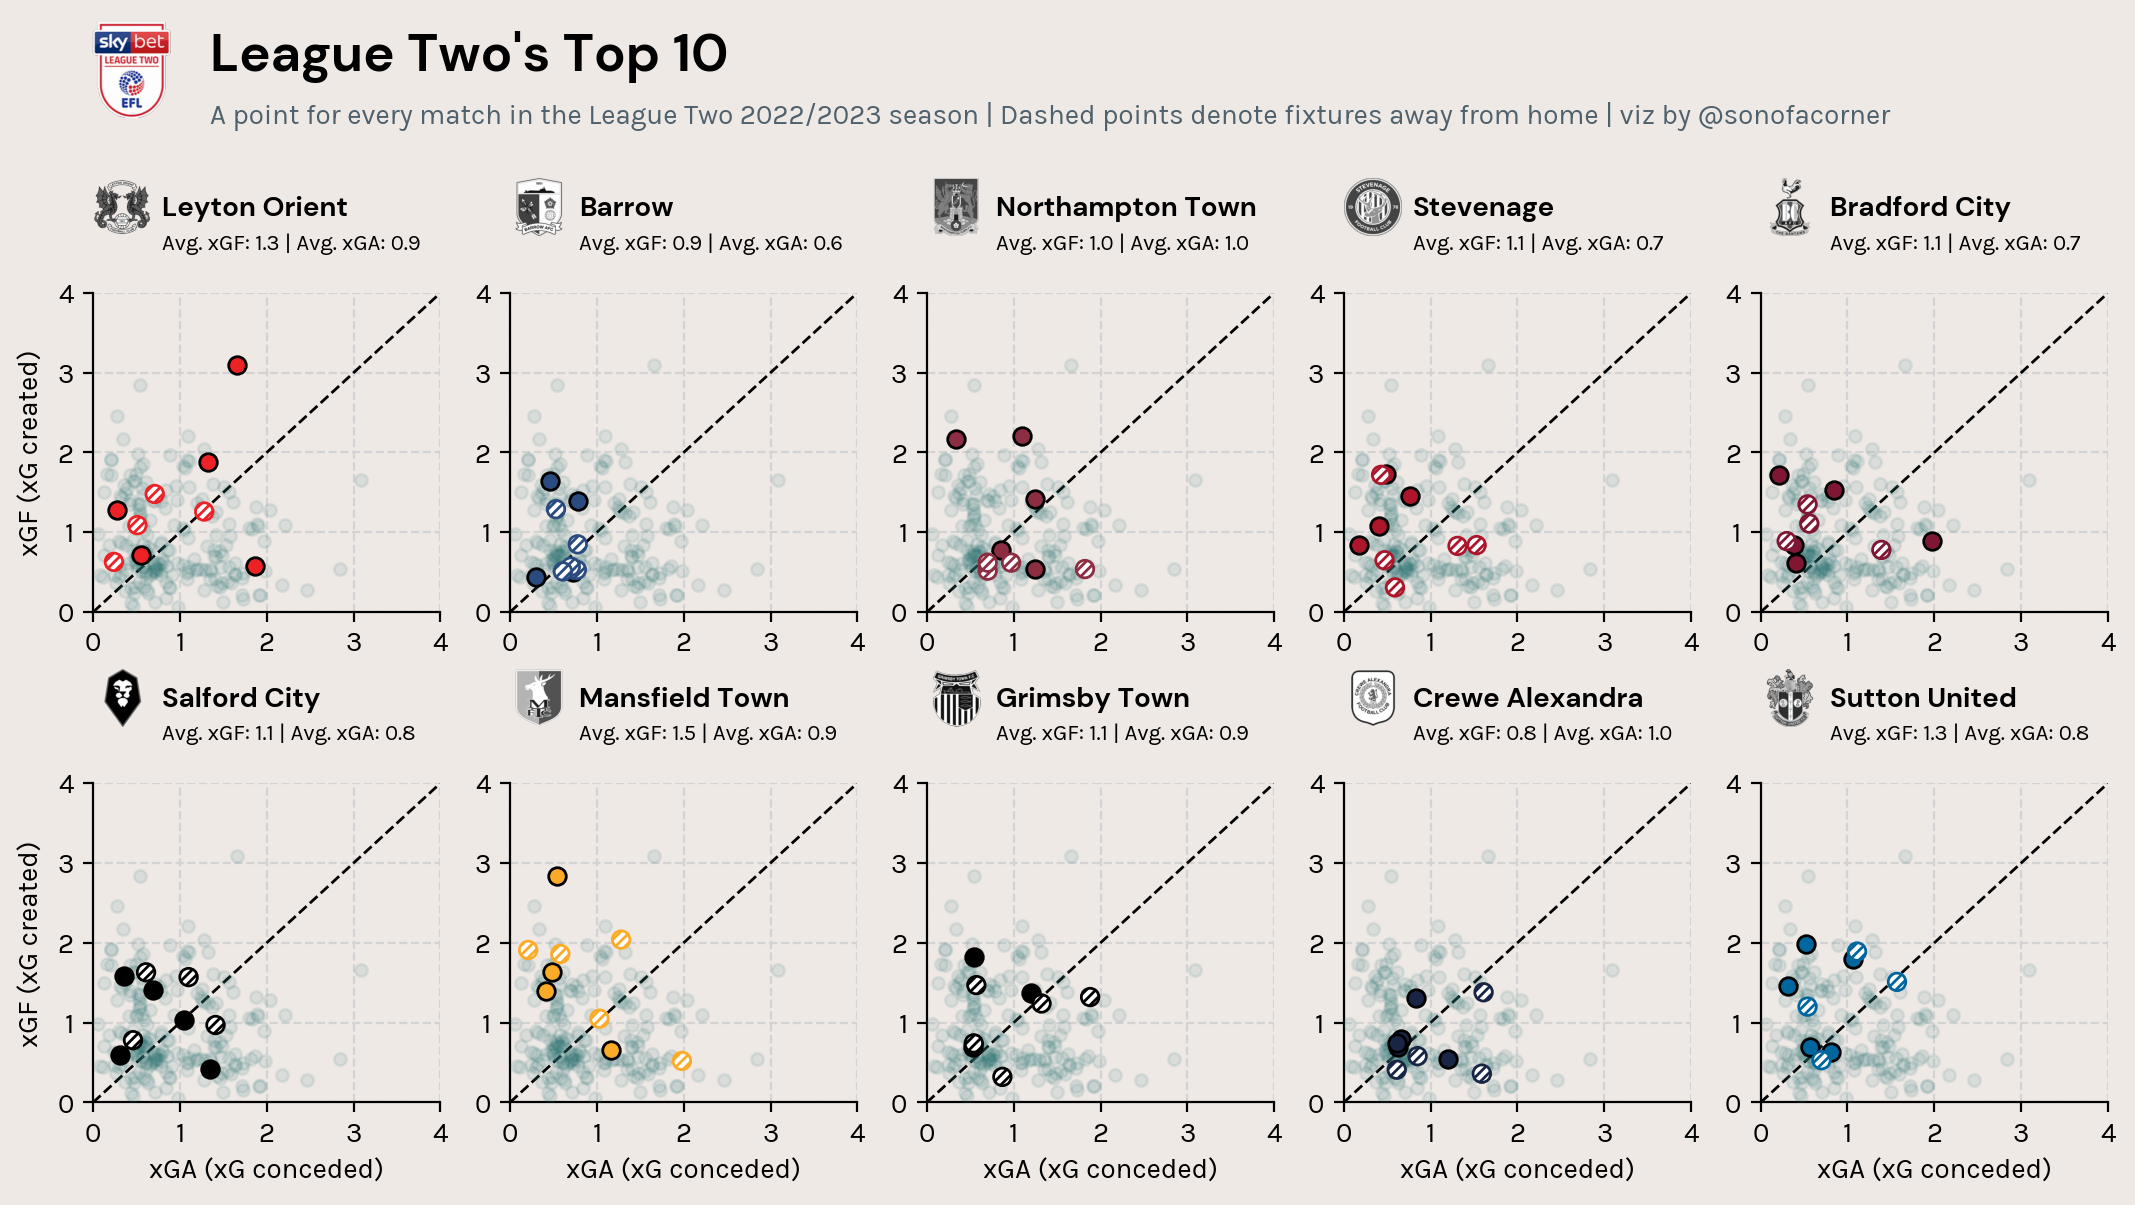

In [73]:
fig = plt.figure(figsize=(13, 6), dpi = 200)
nrows = 4
ncols = 5
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace = 0.3
)

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )
            teamId = top_10[plot_counter]
            color = top_10_colors[plot_counter]

            if col == 0:
                label_y = True
            else:
                label_y = False
            if row == 3:
                label_x = True
            else:
                label_x = False
            
            plot_scatter_xg(ax, teamId, color, label_x, label_y)           
            plot_counter += 1
        else:
            teamId = top_10[logo_counter]
            teamName = df[df['team_id'] == teamId]['team_name'].iloc[0]
            avg_xG_for = df[(df['team_id'] == teamId) & (df['variable'] == 'xG_for')]['value'].mean()
            avg_xG_ag = df[(df['team_id'] == teamId) & (df['variable'] == 'xG_ag')]['value'].mean()
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # -- Add the team name
            ax_text(
                x = 1.2, 
                y = 0.7,
                s = f'<{teamName}>\n<Avg. xGF: {avg_xG_for:.1f} | Avg. xGA: {avg_xG_ag:.1f}>',
                ax = logo_ax, 
                highlight_textprops=[{'weight':'bold', 'font':'DM Sans'},{'size':'8'}],
                font = 'Karla', 
                ha = 'left', 
                size = 10, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )

            logo_counter += 1

fig_text(
    x=0.17, y=.96, 
    s='League Two\'s Top 10',
    va='bottom', ha='left',
    fontsize=19, color='black', font='DM Sans', weight='bold'
)
fig_text(
	x=0.17, y=.92, 
    s='A point for every match in the League Two 2022/2023 season | Dashed points denote fixtures away from home | viz by @sonofacorner',
	va='bottom', ha='left',
	fontsize=10, color='#4E616C', font='Karla'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.1, .93, .08, .08]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{109:.0f}.png'))
logo_ax.imshow(club_icon)
logo_ax.axis('off')

plt.savefig(
	"figures/09192022_league_two_scatter.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/09192022_league_two_scatter_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)